In [1]:
# Access some helpful tools
import tools
import random
%matplotlib inline

In [2]:
# Represent an atom using x,y coordinates, starting at the origin.
atom = [0, 0]

c:\Users\Jeremy Wilson\Documents\GitHub\random-walk-diffusion\tools.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.arrow(0, 0, x, y, width=0.2, length_includes_head=True, color=(0,0,0), edgecolor=(0,0,0), zorder=3.5)


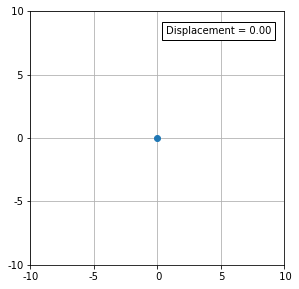

In [3]:
# Display the position of the atom
tools.display_atom(atom)

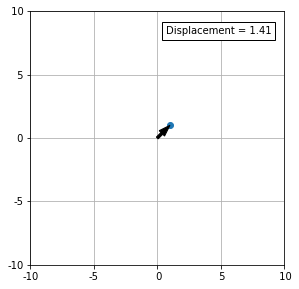

In [4]:
# Make the atom 'walk' around the square lattice by randomly jumping

# Define moving left or right randomly
atom[0] = atom[0] + random.randint(-1, 1)

# Define moving up or down randomly
atom[1] = atom[1] + random.randint(-1, 1)

tools.display_atom(atom)

In [5]:
def jump(atom):
    """Make the atom 'walk' around the square lattice by randomly jumping."""

    directions = ["Up", "Down", "Left", "Right"]
    random_direction = random.choice(directions)

    original_x, original_y = atom

    if random_direction == "Up":
        new_x = original_x
        new_y = original_y + 1

    if random_direction == "Down":
        new_x = original_x
        new_y = original_y - 1

    if random_direction == "Left":
        new_x = original_x - 1
        new_y = original_y

    if random_direction == "Right":
        new_x = original_x + 1
        new_y = original_y

    updated_atom = [new_x, new_y]

    return updated_atom

In [6]:
def displacement(atom):
    x, y = atom
    return (x**2 + y**2)**0.5

In [7]:
def simulate_atom(atom, m_steps):

    atom_history = [atom]
    disp_history = [displacement(atom)]

    for step in range(m_steps):
        atom = jump(atom)
        atom_history.append(atom)

        disp = displacement(atom)
        disp_history.append(disp)

    return atom, atom_history, disp_history

In [8]:
def simulate_atoms(n_atoms, m_steps):

    atoms = []
    atom_histories = []
    disp_histories = []

    for n in range(n_atoms):
        atom = [0, 0]
        atom, atom_history, disp_history = simulate_atom(atom, m_steps)
        atoms.append(atom)
        atom_histories.append(atom_history)
        disp_histories.append(disp_history)

    return atoms, atom_histories, disp_histories

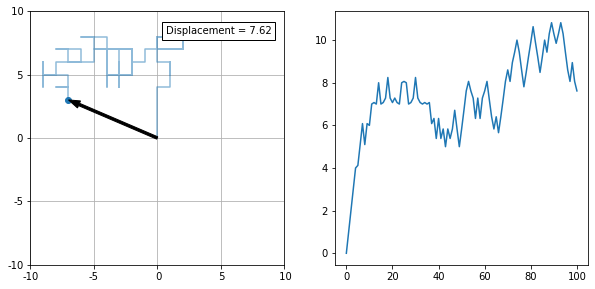

In [9]:
atom_init = [0, 0]
atom_final, atom_history, disp_history = simulate_atom(atom_init, 100)
tools.display_atom(atom_final, atom_history, disp_history)

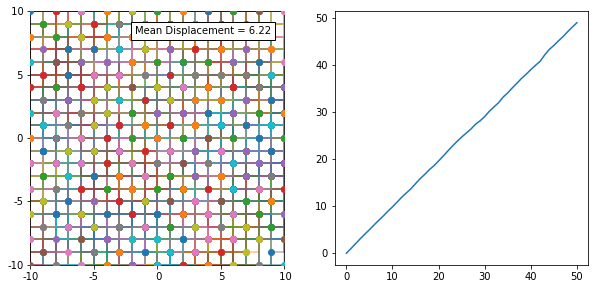

In [14]:
atoms_final, atom_histories, disp_histories = simulate_atoms(300, 50)
tools.display_atoms(atoms_final, atom_histories, disp_histories)

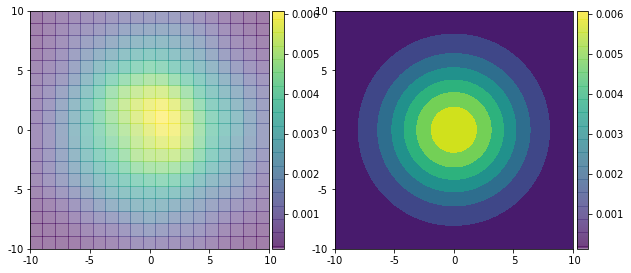

5000
51


In [15]:
tools.display_probability(atoms_final, compare_gaussian=True, num_jumps=len(disp_histories[0]))
print(len(disp_histories))
print(len(disp_histories[0]))